In [31]:
!pip install -q ace_tools_open

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ace_tools_open as tools

In [33]:
"""

Benford's Law Analysis

- populations: Pandas Series with population numbers

Returns:
- TVD between the empirical and theoretical distributions, and some of the theoretical
characteristics of the empirical data (populations), such as the stopping probability
(p_S) and the maximum binary length (N) for Benford scaling invariance.

Outputs the histogram of leading digit frequencies for the population numbers,
and the theoretical Benford's distribution.

"""

def tvd_analysis_benford(populations, plots=True):

  # Extract leading digits
  leading_digits = populations.astype(str).str[0].astype(int)

  # Empirical Distribution
  empirical_counts = leading_digits.value_counts().sort_index()
  empirical_probs = empirical_counts / empirical_counts.sum()

  # Benford's Distribution
  benford_probs = {d: np.log10(1 + 1/d) for d in range(1, 10)}

  # Comparison using TVD
  tvd = 0.5 * sum(abs(empirical_probs.get(d, 0) - benford_probs[d]) for d in range(1, 10))

  # Visualization
  digits = np.array(range(1, 10))
  empirical_values = [empirical_probs.get(d, 0) for d in digits]
  benford_values = [benford_probs[d] for d in digits]

  if plots:
    plt.figure(figsize=(10, 6))
    plt.bar(digits, empirical_values, width=0.4, label='Empirical', align='center')
    plt.bar(digits, benford_values, width=0.4, label='Benford', align='edge')
    plt.xlabel('Leading Digit')
    plt.ylabel('Probability')
    plt.title('Leading Digit Distribution: Empirical vs. Benford\'s Law')
    plt.xticks(digits)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

  # Compute the binary lengths (number of bits) for each sampled number
  binary_lengths = np.array([len(bin(n)) - 2 for n in populations])  # Remove '0b' from binary representation

  # Determine the maximum number of bits (N) in the dataset
  N = np.max(binary_lengths)  # N is the maximum number of bits in the dataset
  p_S_empirical = 1.0 / np.mean(binary_lengths)  # Average over all estimates

  test_results_df = pd.DataFrame(
      {
          'TVD from Benford (theoretical)': [tvd],
          'Empirical Stopping Probability (p_S)': [p_S_empirical],
          'Maximum Binary Length (N)': [N],
          'Average Binary Length': [np.mean(binary_lengths)]
      }
  )

  return test_results_df

Generating 10000 binary numbers with probabilities:
p_0 = 0.32469081578810566, p_1 = 0.32469081578810566, p_S = 0.3506183684237887
Lambda = 1e-12


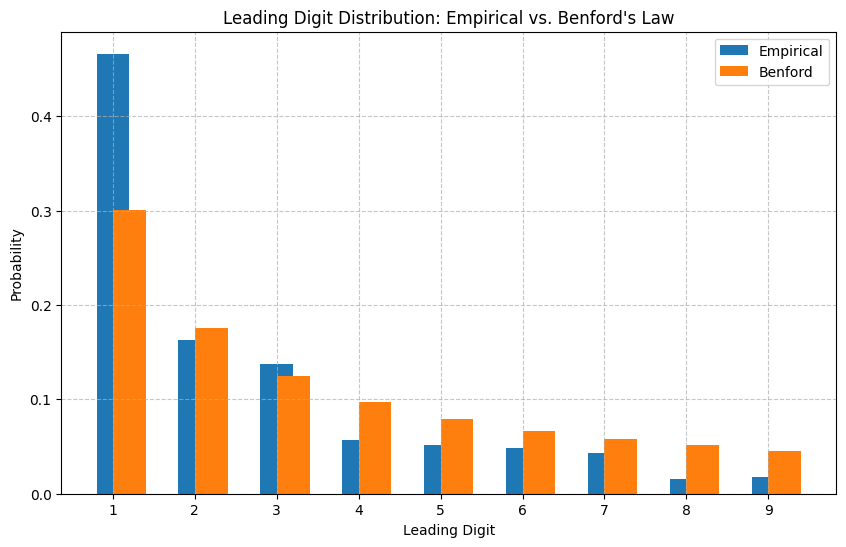

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.40292109388074093, p_1 = 0.40292109388074093, p_S = 0.19415781223851813
Lambda = 1e-06


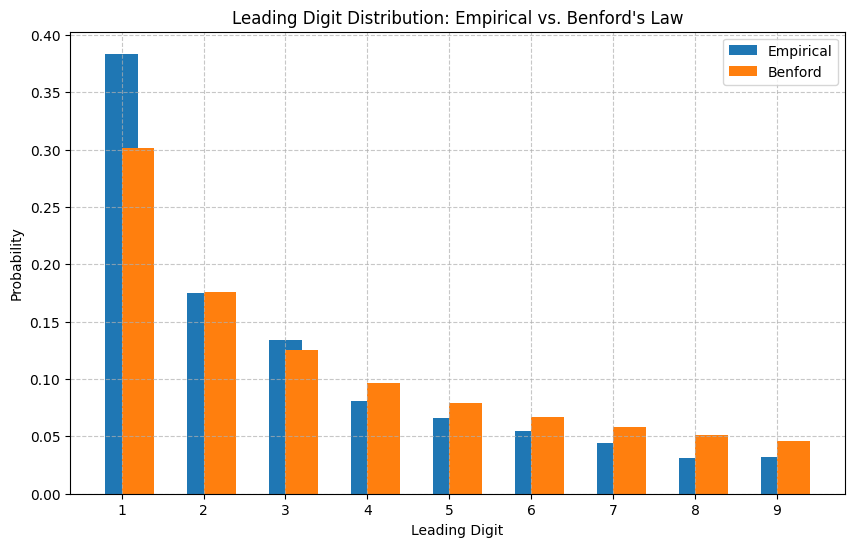

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4823308099555996, p_1 = 0.4823308099555996, p_S = 0.03533838008880075
Lambda = 0.1


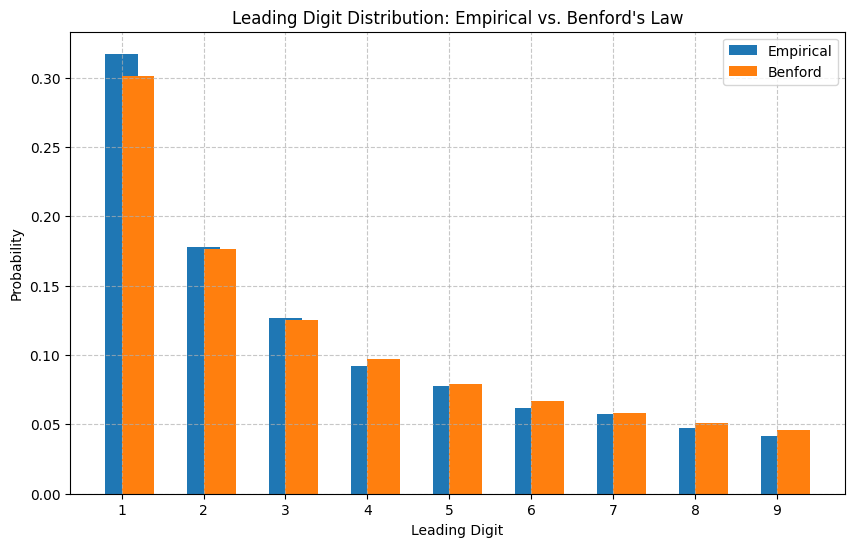

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.48867416669197467, p_1 = 0.48867416669197467, p_S = 0.02265166661605067
Lambda = 0.230759776818


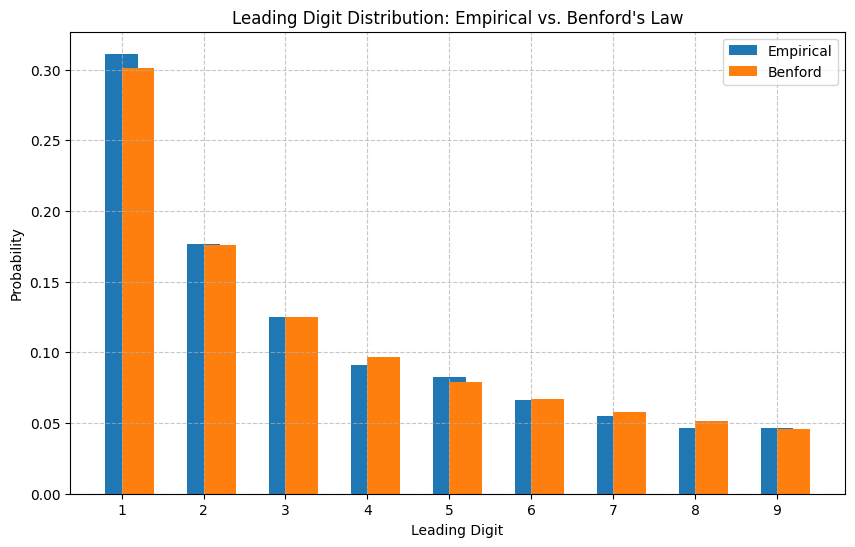

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4906818838173888, p_1 = 0.4906818838173888, p_S = 0.018636232365222383
Lambda = 0.3


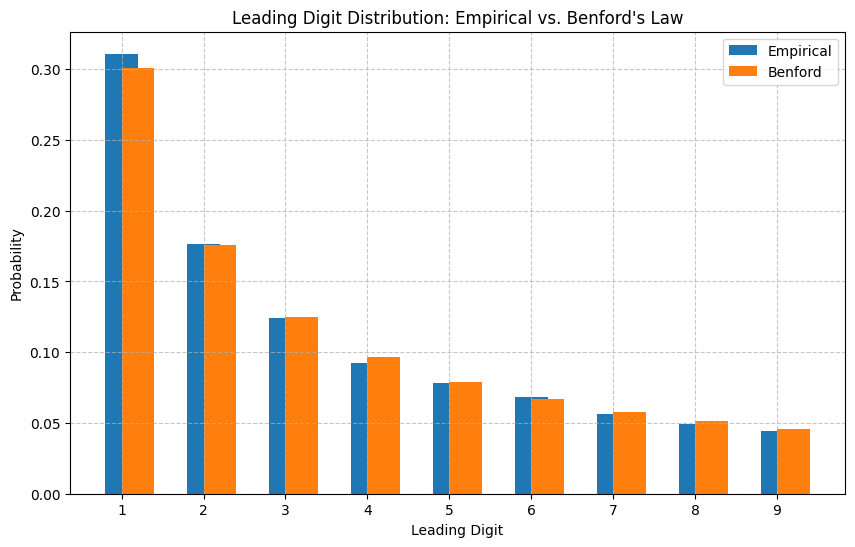

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49289247940165787, p_1 = 0.49289247940165787, p_S = 0.014215041196684264
Lambda = 0.4


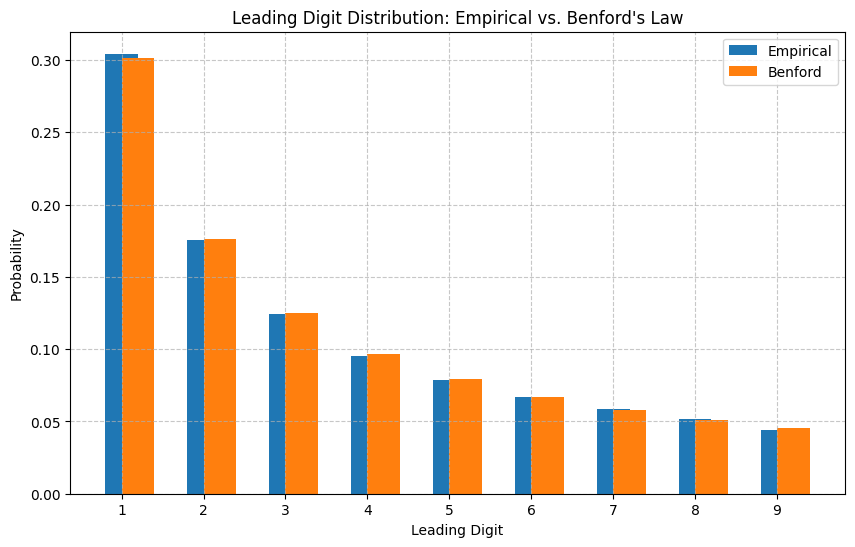

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.49461400659698773, p_1 = 0.49461400659698773, p_S = 0.010771986806024536
Lambda = 0.5


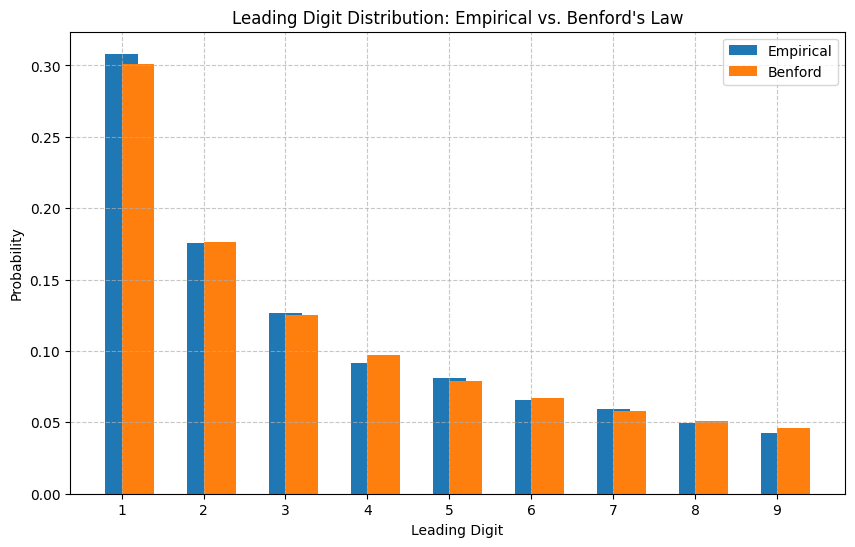

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4960250592106636, p_1 = 0.4960250592106636, p_S = 0.007949881578672824
Lambda = 0.6


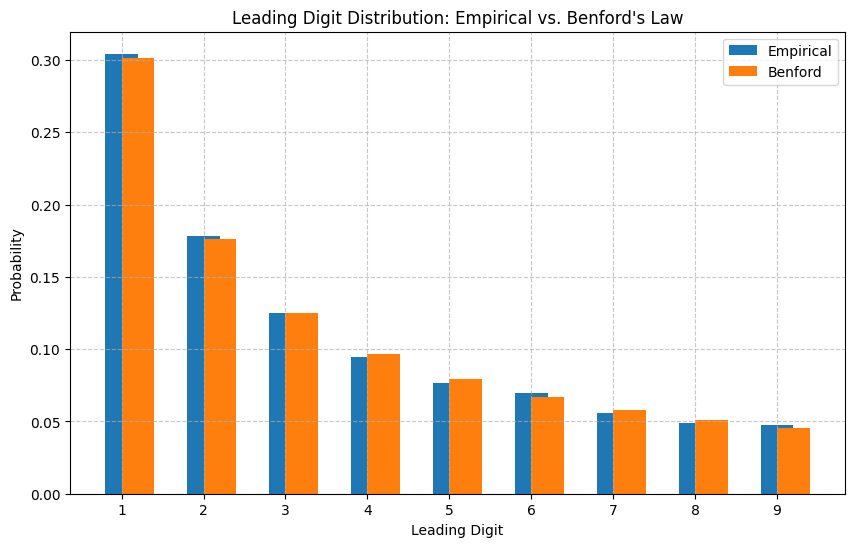

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4972212273066173, p_1 = 0.4972212273066173, p_S = 0.00555754538676545
Lambda = 0.7


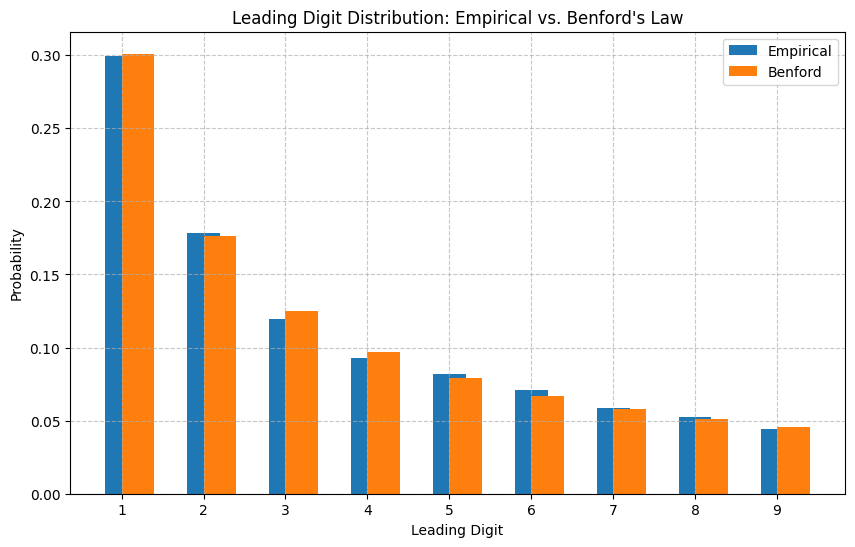

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4982597266025944, p_1 = 0.4982597266025944, p_S = 0.0034805467948112456
Lambda = 0.8


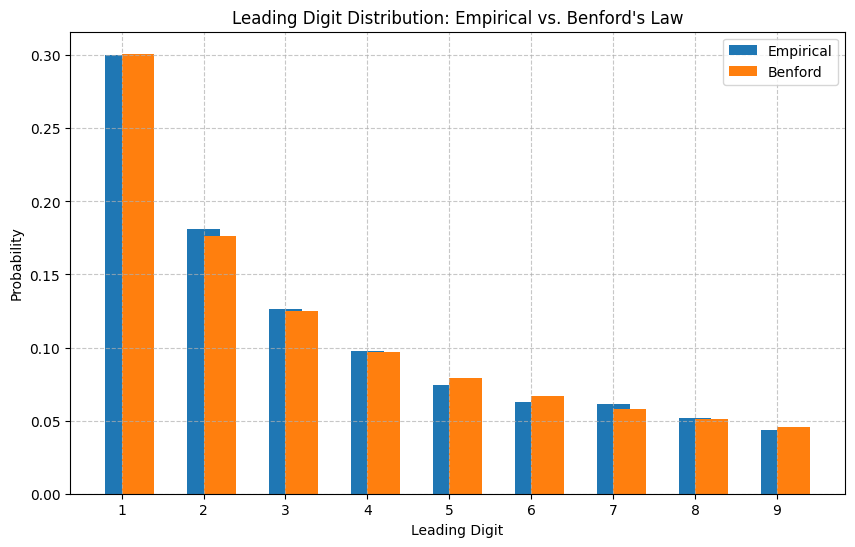

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


Generating 10000 binary numbers with probabilities:
p_0 = 0.4991775481411712, p_1 = 0.4991775481411712, p_S = 0.0016449037176575754
Lambda = 0.9


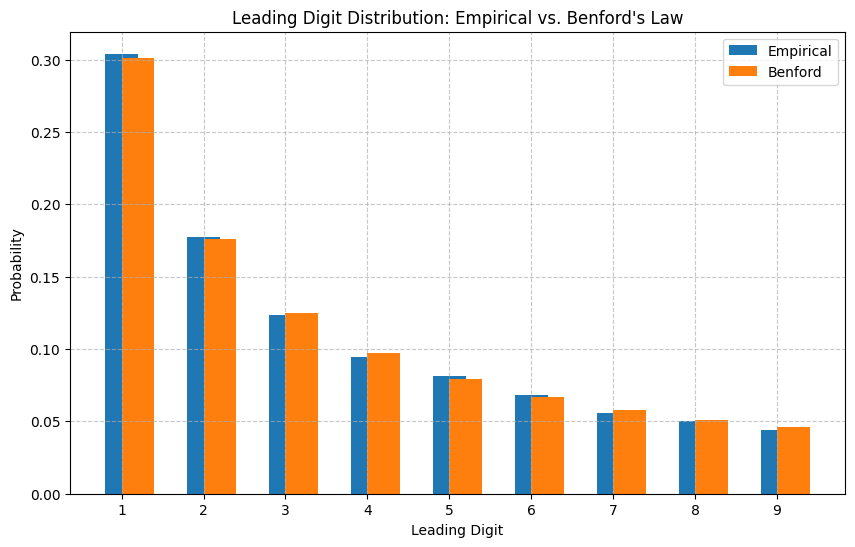

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


In [34]:
import sys
sys.set_int_max_str_digits(100_000)

"""

Generating binary numbers as strings with probabilities
- p_0 for '0',
- p_1 for '1',
- p_S for stopping.

"""

def generate_binary_number(p_0, p_1, p_S):
  """Generates a binary number according to the process."""
  binary_number = '1'  # Always start with a leading 1
  while True:
      r = np.random.rand()
      if r < p_S:
          break  # Stop the process
      elif r < p_S + p_0:
          binary_number += '0'
      else:
          binary_number += '1'
  return int(binary_number, 2)

"""

Running experiemnts with the model, comparison with Benford's law, and plotting.

"""

def run_experiments_benford(num_numbers, N, lambdas, plots=True):

  tvds_measured = []

  for l in lambdas:  # Loop over lambdas

    # Probabilities for binary strings generation
    p_S = 1 - l**(1/N)  # Stopping probability
    p_0 = p_1 = l**(1/N) / 2  # Probability of 0 or 1

    if plots:
      print(f"Generating {num_numbers} binary numbers with probabilities:")
      print(f"p_0 = {p_0}, p_1 = {p_1}, p_S = {p_S}")
      print(f"Lambda = {l}")

    # Generate binary numbers
    binary_numbers = pd.Series([generate_binary_number(p_0, p_1, p_S) for _ in range(num_numbers)], dtype="object")

    # Run TVD analysis
    binary_analysis = tvd_analysis_benford(binary_numbers, plots=plots)
    if plots:
      tools.display_dataframe_to_user(name="Test Results (Benford TVD Analysis)", dataframe=binary_analysis)

    tvd_theoretical = binary_analysis['TVD from Benford (theoretical)'][0]
    tvds_measured.append([l, tvd_theoretical])

  return tvds_measured

#
lambdas = [1e-12, 1e-6, 0.1, 0.230759776818, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
_ = run_experiments_benford(num_numbers=10_000, N=64, lambdas = lambdas, plots=True)

In [35]:
#
lambdas = [1e-12, 1e-6, 0.025, 0.05, 0.075, 0.1, 0.15, 0.175, 0.2, 0.230759776818, 0.225, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Several lambdas

#
benford_tvd_stats = []
num_trials = 100

# Run trials sequentially
for i in range(num_trials):
  print(f"Running trial {i+1} of {num_trials} ...")
  tvds_measured = run_experiments_benford(num_numbers=10_000, N=64, lambdas = lambdas, plots=False)
  benford_tvd_stats.append(tvds_measured)
  print("Done.")

Running trial 1 of 100 ...
Done.
Running trial 2 of 100 ...
Done.
Running trial 3 of 100 ...
Done.
Running trial 4 of 100 ...
Done.
Running trial 5 of 100 ...
Done.
Running trial 6 of 100 ...
Done.
Running trial 7 of 100 ...
Done.
Running trial 8 of 100 ...
Done.
Running trial 9 of 100 ...
Done.
Running trial 10 of 100 ...
Done.
Running trial 11 of 100 ...
Done.
Running trial 12 of 100 ...
Done.
Running trial 13 of 100 ...
Done.
Running trial 14 of 100 ...
Done.
Running trial 15 of 100 ...
Done.
Running trial 16 of 100 ...
Done.
Running trial 17 of 100 ...
Done.
Running trial 18 of 100 ...
Done.
Running trial 19 of 100 ...
Done.
Running trial 20 of 100 ...
Done.
Running trial 21 of 100 ...
Done.
Running trial 22 of 100 ...
Done.
Running trial 23 of 100 ...
Done.
Running trial 24 of 100 ...
Done.
Running trial 25 of 100 ...
Done.
Running trial 26 of 100 ...
Done.
Running trial 27 of 100 ...
Done.
Running trial 28 of 100 ...
Done.
Running trial 29 of 100 ...
Done.
Running trial 30 of 100

In [36]:
def plot_stats(lambdas, stats, value_name='TVD', use_sem=False, capsize=4, figsize=(10, 6)):
    """
    Plot mean {value_name} per lambda as bars with error bars.

    Parameters
    ----------
    lambdas : iterable
        The set of lambda values to aggregate/plot.
    stats : iterable
        Each element is an iterable of (lambda, value) pairs for one trial.
    value_name : str
        Label for the y-axis.
    use_sem : bool
        If True, show standard error of the mean (std/sqrt(n)) as error bars.
        If False (default), show standard deviation.
    capsize : float
        Error bar cap size (points).
    figsize : tuple
        Matplotlib figure size.
    """
    # Aggregate values for each lambda
    lambda_val_map = {l: [] for l in lambdas}
    for trial in stats:
        for l, val in trial:
            if l in lambda_val_map:
                lambda_val_map[l].append(val)

    # Compute mean and dispersion (std or sem) for each lambda
    lambdas_sorted = sorted(lambda_val_map.keys())
    mean_values, err_values, counts = [], [], []
    for l in lambdas_sorted:
        vals = np.array(lambda_val_map[l], dtype=float)
        n = max(len(vals), 1)
        mu = float(np.mean(vals)) if n else np.nan
        sd = float(np.std(vals, ddof=1)) if n > 1 else 0.0
        err = sd / np.sqrt(n) if (use_sem and n > 1) else sd
        mean_values.append(mu)
        err_values.append(err)
        counts.append(n)

    # Make bar plot with error bars
    x = np.arange(len(lambdas_sorted))
    plt.figure(figsize=figsize)
    plt.bar(x, mean_values, yerr=err_values, capsize=capsize)
    plt.xticks(x, [f"{l:g}" for l in lambdas_sorted], rotation=45, ha="right")
    plt.ylabel(value_name)
    plt.xlabel("Lambda")
    title_err = "SEM" if use_sem else "Std Dev"
    plt.title(f"Mean {value_name} with {title_err} Error Bars")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

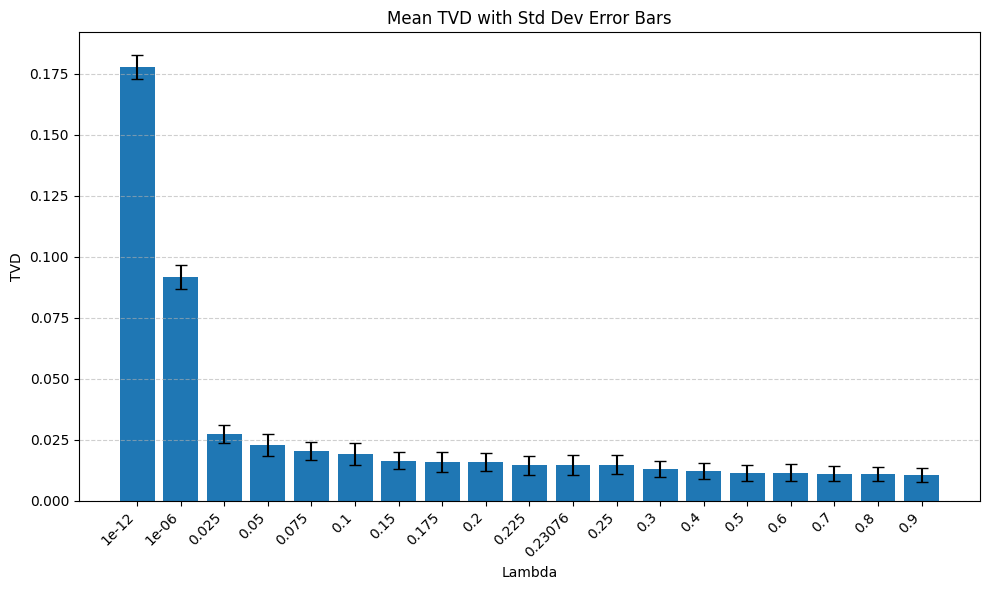

In [37]:
plot_stats(lambdas=lambdas, stats=benford_tvd_stats, value_name='TVD', use_sem=False)

In [38]:
print(lambdas)

[1e-12, 1e-06, 0.025, 0.05, 0.075, 0.1, 0.15, 0.175, 0.2, 0.230759776818, 0.225, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [39]:
lambdas_zoom = lambdas[3:]
print(lambdas_zoom)

[0.05, 0.075, 0.1, 0.15, 0.175, 0.2, 0.230759776818, 0.225, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


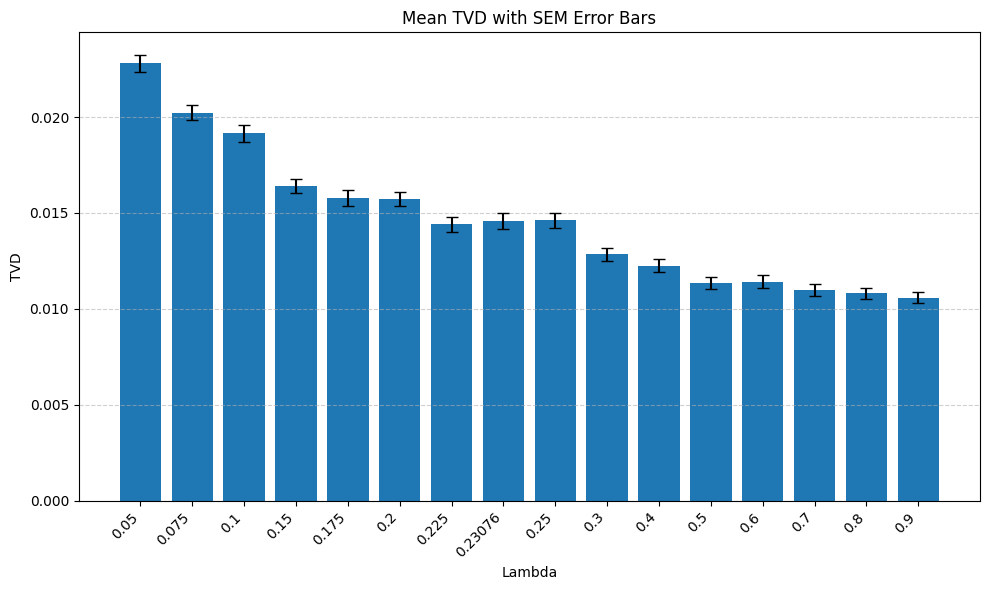

In [40]:
plot_stats(lambdas=lambdas_zoom, stats=benford_tvd_stats, value_name='TVD', use_sem=True)

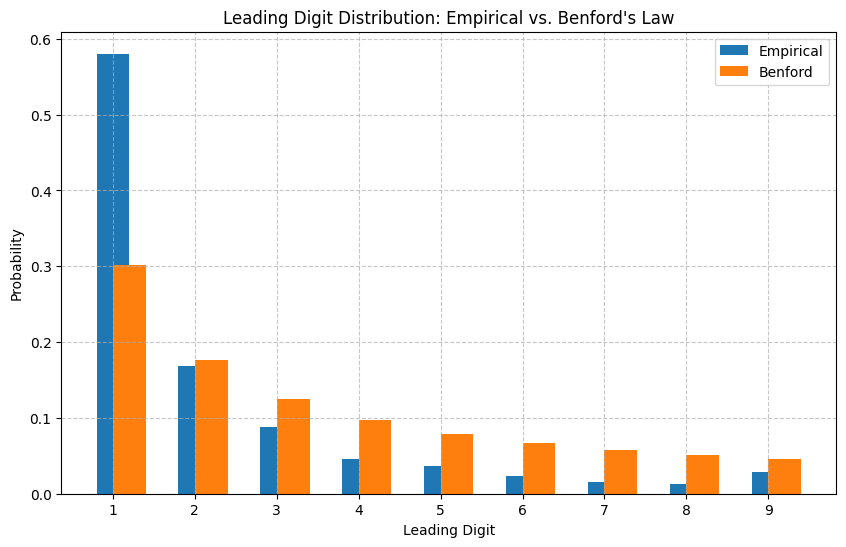

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


In [45]:
# Load the dataset (City Population accross the Globe by the Year)
url = 'https://datahub.io/core/population-city/r/unsd-citypopulation-year-both.csv'
df = pd.read_csv(url)

# Filter for the most recent year available
latest_year = '2023'
df_latest = df[df['Year'] == latest_year]

# Extract population values and drop missing or non-numeric entries
populations = pd.to_numeric(df_latest['Value'], errors='coerce').dropna().astype(int)

# Compare to Benford's distribution
city_pop_analysis_benford = tvd_analysis_benford(populations)
tools.display_dataframe_to_user(name="Test Results (Benford TVD Analysis)", dataframe=city_pop_analysis_benford)

Generating 598 binary numbers with probabilities:
p_0 = 0.472659, p_1 = 0.472659, p_S = 0.05468200000000001
Lambda = 0.24515919499762784


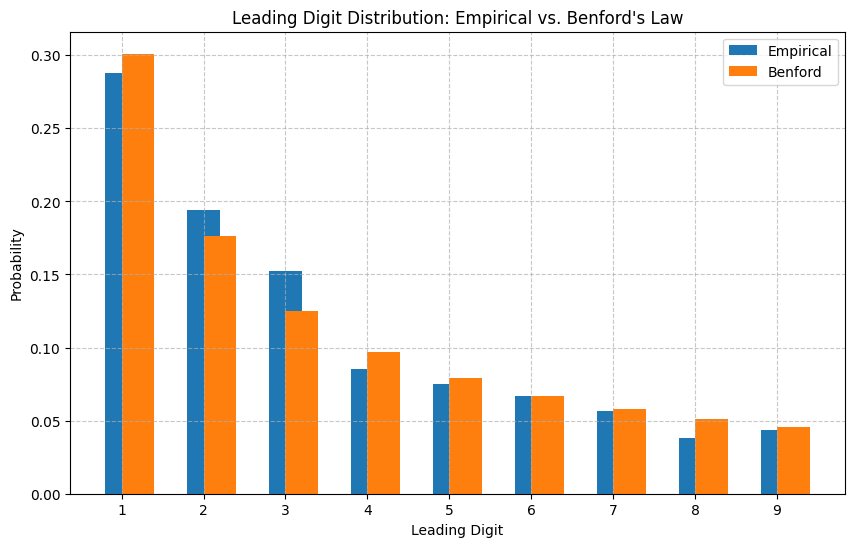

Test Results (Benford TVD Analysis)


Loading ITables v2.4.4 from the internet... (need help?)


In [54]:
N = 25
p_S_empirical = 0.054682
l = (1-p_S_empirical)**N
_ = run_experiments_benford(num_numbers=len(populations), N=N, lambdas=[l])